In [ ]:
## win red / blue
## avg gold winning vs losing team
## avg KD winning vs losing team
##correlation matrix


In [1]:
import numpy as np


In [3]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\neilc\AppData\Local\Temp\ipykernel_32984\3715049989.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette=["red", "blue"])


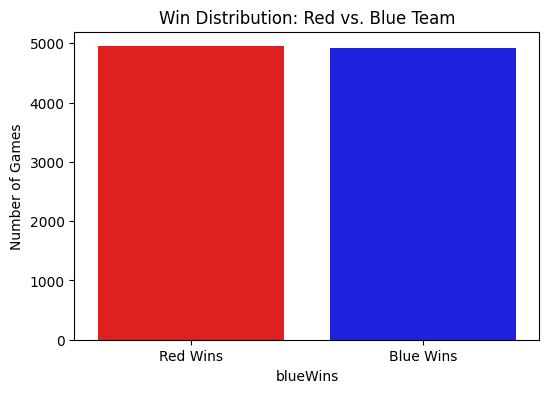

<Figure size 600x400 with 0 Axes>

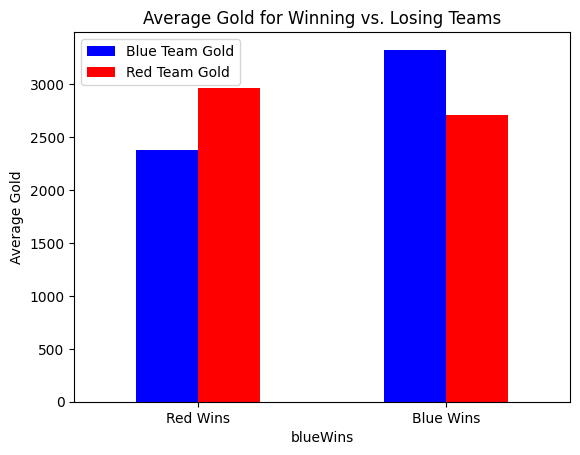

<Figure size 600x400 with 0 Axes>

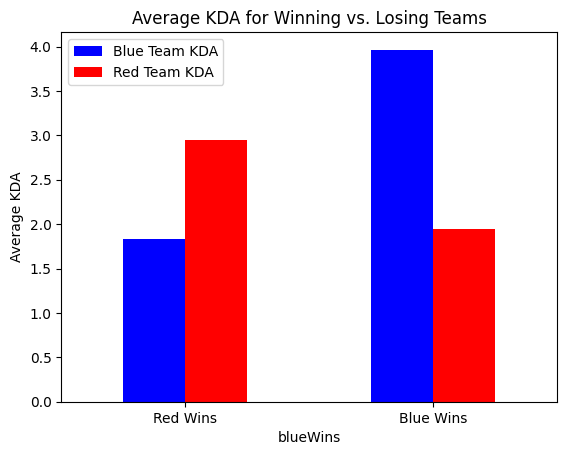

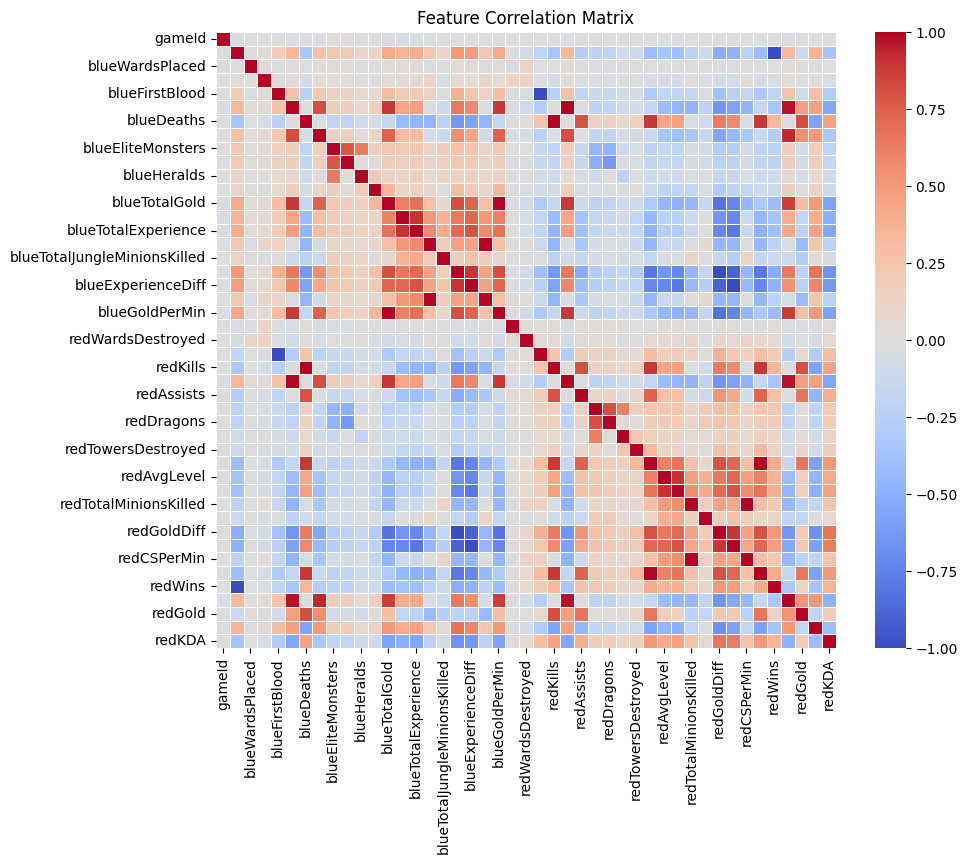

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset using a relative path
file_path = "high_diamond_ranked_10min.csv"
df = pd.read_csv(file_path)

# Add a redWins column for easier analysis
df["redWins"] = 1 - df["blueWins"]

# Win rate comparison (Red vs. Blue)
win_counts = df["blueWins"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=win_counts.index, y=win_counts.values, palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"])
plt.ylabel("Number of Games")
plt.title("Win Distribution: Red vs. Blue Team")
plt.show()

# Average gold for winning vs. losing teams
df["blueGold"] = df["blueKills"] * 300 + df["blueAssists"] * 150  # Approximate gold
df["redGold"] = df["blueDeaths"] * 300 + df["blueAssists"] * 150  # Approximate gold

gold_means = df.groupby("blueWins")[["blueGold", "redGold"]].mean()
plt.figure(figsize=(6, 4))
gold_means.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"], rotation=0)
plt.ylabel("Average Gold")
plt.title("Average Gold for Winning vs. Losing Teams")
plt.legend(["Blue Team Gold", "Red Team Gold"])
plt.show()

# Average KDA for winning vs. losing teams
df["blueKDA"] = (df["blueKills"] + df["blueAssists"]) / df["blueDeaths"].replace(0, 1)
df["redKDA"] = (df["blueDeaths"] + df["blueAssists"]) / df["blueKills"].replace(0, 1)

kda_means = df.groupby("blueWins")[["blueKDA", "redKDA"]].mean()
plt.figure(figsize=(6, 4))
kda_means.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"], rotation=0)
plt.ylabel("Average KDA")
plt.title("Average KDA for Winning vs. Losing Teams")
plt.legend(["Blue Team KDA", "Red Team KDA"])
plt.show()

# Correlation matrix without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()
